# Performance Plots for ttbar reconstruction
## Jessica James [JMSJES004]

Original code written by James Mitchley

In [1]:
import uproot3 as uproot
import uproot3_methods.classes.TLorentzVector as LVepm
import uproot3_methods.classes.TVector2 as LV2
import matplotlib.pyplot as plt
from matplotlib import gridspec
import infofile 
import numpy as np
import mplhep as hep
import awkward as ak
from matplotlib.lines import Line2D

In [2]:
filename = "neutrinos.txt"

# Initialize arrays for each column
v0_pt = []
v0_eta = []
v0_phi = []
v0_e = []
v1_pt = []
v1_eta = []
v1_phi = []
v1_e = []

# Read the file extracting values
with open(filename, "r") as file:
    for line in file:
        values = line.split()
        v0_pt.append(float(values[0]))
        v0_eta.append(float(values[1]))
        v0_phi .append(float(values[2]))
        v0_e.append(float(values[3]))
        v1_pt.append(float(values[4]))
        v1_eta.append(float(values[5]))
        v1_phi.append(float(values[6]))
        v1_e.append(float(values[7]))

In [3]:
# Read in from root file
file = 'ttbar_reco_dilep_neutrinos.root'

tree = uproot.open(file)["nominal"]

MC_t_beforeFSR_m, MC_t_beforeFSR_eta, MC_t_beforeFSR_phi, MC_t_beforeFSR_pt, MC_tbar_beforeFSR_m, MC_tbar_beforeFSR_eta, MC_tbar_beforeFSR_phi, MC_tbar_beforeFSR_pt, lep0_pt, lep0_eta, lep0_phi, lep0_e, lep1_pt, lep1_eta, lep1_phi, lep1_e, b0_pt, b0_eta, b0_phi, b0_e, b1_pt, b1_eta, b1_phi, b1_e, v0_pt_truth, v0_eta_truth, v0_phi_truth, v0_m_truth, v1_pt_truth, v1_eta_truth, v1_phi_truth, v1_m_truth = tree.arrays(["MC_t_beforeFSR_m", "MC_t_beforeFSR_eta", "MC_t_beforeFSR_phi", "MC_t_beforeFSR_pt", "MC_tbar_beforeFSR_m", "MC_tbar_beforeFSR_eta", "MC_tbar_beforeFSR_phi", "MC_tbar_beforeFSR_pt", "lep0_pt", "lep0_eta", "lep0_phi", "lep0_e", "lep1_pt", "lep1_eta", "lep1_phi", "lep1_e", "b0_pt", "b0_eta", "b0_phi", "b0_e", "b1_pt", "b1_eta", "b1_phi", "b1_e", "v0_pt_truth", "v0_eta_truth", "v0_phi_truth", "v0_m_truth", "v1_pt_truth", "v1_eta_truth", "v1_phi_truth", 'v1_m_truth'], outputtype=tuple)
    

In [4]:
# Get list of indexes where eqn's sovled

good_index = []

for i in range(len(v0_pt)):
    if (v0_pt[i] > 0 and v1_pt[i] > 0):
        good_index.append(i)
        

In [5]:
# Get percentage efficency - this doesn't get percentage efficiency

len(good_index)/100

100.0

In [6]:
v0_m_truth[50]


22.986252

In [7]:
# m_tt creation

m_tt = []
m_tt_truth = []

# Create m_tt

for i in range(len(MC_t_beforeFSR_m)):
    
    truth_t = LVepm.TLorentzVector.from_ptetaphim(MC_t_beforeFSR_pt[i], MC_t_beforeFSR_eta[i], MC_t_beforeFSR_phi[i], MC_t_beforeFSR_m[i])
    #truth_t.SetPtEtaPhiM(MC_t_beforeFSR_pt[i], MC_t_beforeFSR_eta[i], MC_t_beforeFSR_phi[i], MC_t_beforeFSR_m[i])
    truth_tbar = LVepm.TLorentzVector.from_ptetaphim(MC_tbar_beforeFSR_pt[i], MC_tbar_beforeFSR_eta[i], MC_tbar_beforeFSR_phi[i], MC_tbar_beforeFSR_m[i])
    #truth_tbar.SetPtEtaPhiM(MC_tbar_beforeFSR_pt[i], MC_tbar_beforeFSR_eta[i], MC_tbar_beforeFSR_phi[i], MC_tbar_beforeFSR_m[i])
    truth_tt = truth_t + truth_tbar
    m_tt_truth.append(truth_tt.mass/1000)

    if i in good_index:
#        v0_m_truth[i]=0
#        v1_m_truth[i]=0
        reco_lep0 = LVepm.TLorentzVector.from_ptetaphie(lep0_pt[i], lep0_eta[i], lep0_phi[i], lep0_e[i])
        #reco_lep0.SetPtEtaPhiE(lep0_pt[i], lep0_eta[i], lep0_phi[i], lep0_e[i])
        reco_lep1 = LVepm.TLorentzVector.from_ptetaphie(lep1_pt[i], lep1_eta[i], lep1_phi[i], lep1_e[i])
        #reco_lep1.SetPtEtaPhiE(lep1_pt[i], lep1_eta[i], lep1_phi[i], lep1_e[i])
        reco_b0 = LVepm.TLorentzVector.from_ptetaphie(b0_pt[i], b0_eta[i], b0_phi[i], b0_e[i])
        #reco_b0.SetPtEtaPhiE(b0_pt[i], b0_eta[i], b0_phi[i], b0_e[i])
        reco_b1 = LVepm.TLorentzVector.from_ptetaphie(b1_pt[i], b1_eta[i], b1_phi[i], b1_e[i])
        #reco_b1.SetPtEtaPhiE(b1_pt[i], b1_eta[i], b1_phi[i], b1_e[i])
        reco_v0 = LVepm.TLorentzVector.from_ptetaphim(v0_pt[i], v0_eta[i], v0_phi[i], v0_m_truth[i])
        #reco_v0.SetPtEtaPhiM(v0_pt[i], v0_eta[i], v0_phi[i], v0_m_truth[i])
        reco_v1 = LVepm.TLorentzVector.from_ptetaphim(v1_pt[i], v1_eta[i], v1_phi[i], v1_m_truth[i])
        #reco_v1.SetPtEtaPhiM(v1_pt[i], v1_eta[i], v1_phi[i], v1_m_truth[i])
        reco_tt = reco_lep0 + reco_lep1 + reco_b0 + reco_b1 + reco_v1 #+ reco_v1
        m_tt.append(reco_tt.mass/1000)
    

C:\Users\ADMIN\anaconda3\lib\site-packages\uproot3_methods\classes\TLorentzVector.py:735: RuntimeWarning: overflow encountered in sinh
  return self.pt * self.awkward0.numpy.sinh(self.eta)


Text(0, 0.5, 'Events')

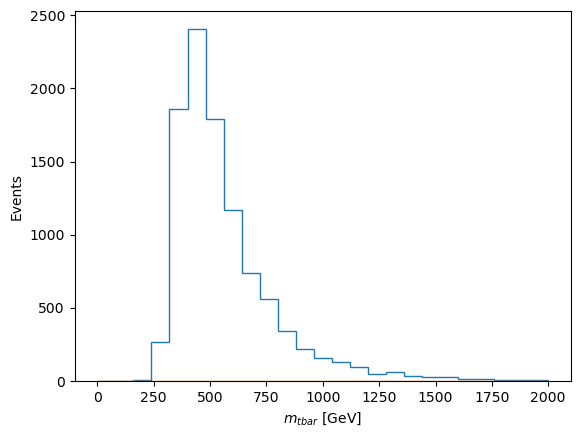

In [8]:
# Distribution of Neutrino Masses
bins = plt.hist(m_tt, bins=25, range=(0,2000), stacked=False, label="Predicted", histtype='step', density=False)
plt.hist(truth_t.mass, bins=bins[1], stacked=False, label="Actual", histtype='step', density=False)
plt.xlabel("$m_{tbar}$ [GeV]")
plt.ylabel("Events")

(0.0, 3700.0)

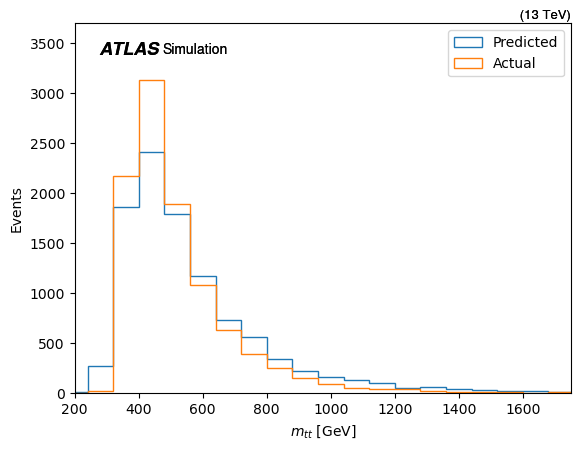

In [9]:
# Plot un normalised histogram

hep.atlas.label( loc=1, data=False)

bins = plt.hist(m_tt, bins=25, range=(0,2000), stacked=False, label="Predicted", histtype='step', density=False)
plt.hist(m_tt_truth, bins=bins[1], stacked=False, label="Actual", histtype='step', density=False)
hep.atlas.label( loc=1, data=False)
plt.xlabel("$m_{tt}$ [GeV]")
plt.ylabel("Events")
plt.legend()
plt.xlim(200, 1750)
plt.ylim(0, 3700)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9076\1664306996.py:16: RuntimeWarning: invalid value encountered in double_scalars
  ratios = [bins[0][i]/bins1[0][i] for i in range(len(bins[0]))]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9076\1664306996.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  ratios = [bins[0][i]/bins1[0][i] for i in range(len(bins[0]))]


(200.0, 1750.0)

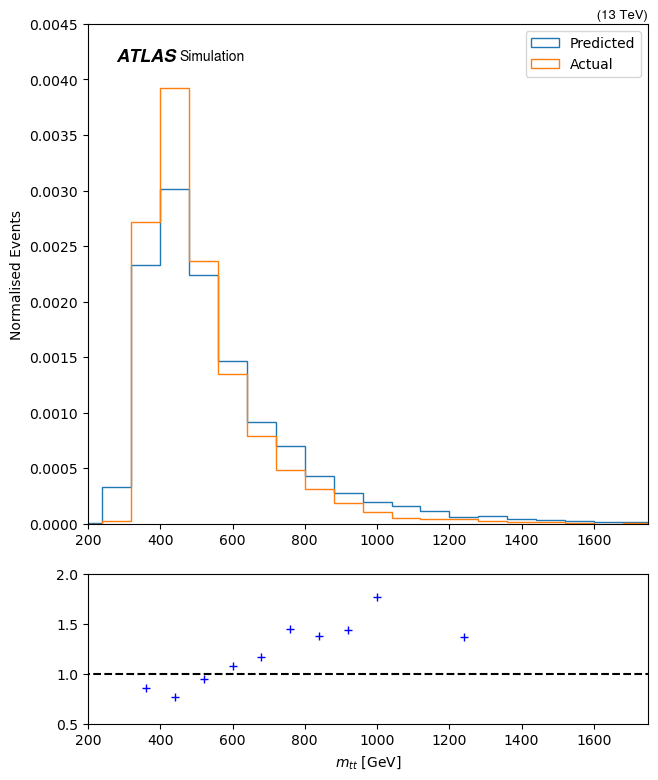

In [10]:
# Plot normalised histogram and ratio plot

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))
hep.atlas.label(ax = ax1, loc=1, data=False)

bins = ax1.hist(m_tt, bins=25, range=(0,2000), stacked=False, label="Predicted", histtype='step', density=True)
bins1 = ax1.hist(m_tt_truth, bins=bins[1], stacked=False, label="Actual", histtype='step', density=True)
ax2.set_xlabel("$m_{tt}$ [GeV]")
ax1.set_ylabel("Normalised Events")
ax1.legend()
ax1.set_position([0.15, 0.4, 0.7, 0.5])
ax2.set_position([0.15, 0.2, 0.7, 0.15])
ax1.set_xlim(200,1750)
ax1.set_ylim(0,0.0045)

ratios = [bins[0][i]/bins1[0][i] for i in range(len(bins[0]))]
bin_centers = [bins[1][i] + (bins[1][i+1] - bins[1][i])/2 for i in range(len(bins[1])-1)]
ax2.plot(bin_centers, ratios, marker='+', linestyle='None', color='blue' )
ax2.plot(np.linspace(0, 2000, 10), np.linspace(1, 1, 10), linestyle='--', color='black')
ax2.set_ylim(0.5,2)
ax2.set_xlim(200,1750)

Text(0, 0.5, 'Events')

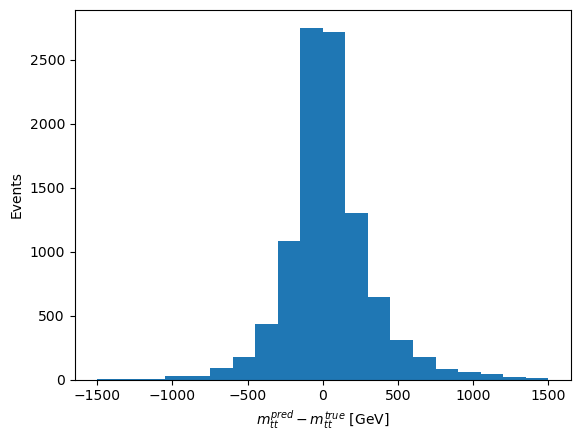

In [11]:
m_tt_truth_gi = [m_tt_truth[i] for i in good_index]

predacc = [m_tt - m_tt_truth_gi for m_tt_truth_gi, m_tt in zip(m_tt_truth_gi, m_tt)]

plt.hist(predacc, bins=20, range=(-1500,1500),stacked=False, density=False)
plt.xlabel("$m_{tt}^{pred} - m_{tt}^{true}$ [GeV]")
plt.ylabel("Events")

(220.0, 1000.0)

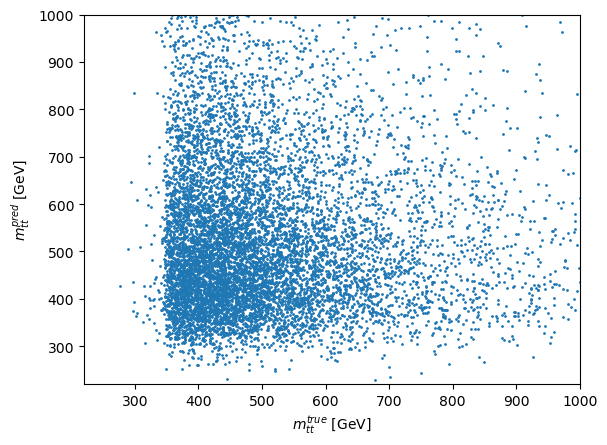

In [12]:
# Plot scatter diagram

plt.scatter(m_tt_truth_gi, m_tt, s=1)
plt.xlabel("$m_{tt}^{true}$ [GeV]")
plt.ylabel("$m_{tt}^{pred}$ [GeV]")
plt.xlim(220, 1000)
plt.ylim(220, 1000)


In [13]:
m_t = []
m_t_truth = []
m_tbar = []
m_tbar_truth = []

for i in range(len(MC_t_beforeFSR_m)):
    
    truth_t= LVepm.TLorentzVector.from_ptetaphim(MC_t_beforeFSR_pt[i], MC_t_beforeFSR_eta[i], MC_t_beforeFSR_phi[i], MC_t_beforeFSR_m[i])
    truth_tbar= LVepm.TLorentzVector.from_ptetaphim(MC_tbar_beforeFSR_pt[i], MC_tbar_beforeFSR_eta[i], MC_tbar_beforeFSR_phi[i], MC_tbar_beforeFSR_m[i])
    m_t_truth.append(truth_t.mass/1000)
    m_tbar_truth.append(truth_tbar.mass/1000)

    if i in good_index:
        reco_lep0 = LVepm.TLorentzVector.from_ptetaphie(lep0_pt[i], lep0_eta[i], lep0_phi[i], lep0_e[i])
        
        reco_lep1= LVepm.TLorentzVector.from_ptetaphie(lep1_pt[i], lep1_eta[i], lep1_phi[i], lep1_e[i])

        reco_b0=LVepm.TLorentzVector.from_ptetaphie(b0_pt[i], b0_eta[i], b0_phi[i], b0_e[i])
        
        reco_b1=LVepm.TLorentzVector.from_ptetaphie(b1_pt[i], b1_eta[i], b1_phi[i], b1_e[i])
        reco_v0 = LVepm.TLorentzVector.from_ptetaphim(v0_pt[i], v0_eta[i], v0_phi[i], v0_m_truth[i])
        reco_v1 = LVepm.TLorentzVector.from_ptetaphim(v1_pt[i], v1_eta[i], v1_phi[i], v1_m_truth[i])
        reco_t = reco_lep0 + reco_b0 + reco_v0
        reco_tbar = reco_lep1 + reco_b1 + reco_v1
        m_t.append(reco_t.mass/1000)
        m_tbar.append(reco_tbar.mass/1000)

Text(0, 0.5, 'Events')

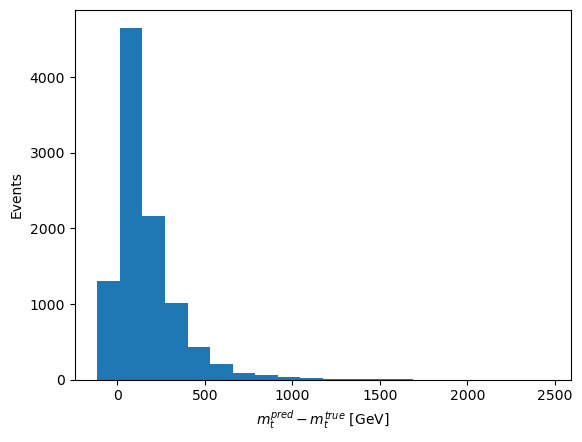

In [14]:
m_t_truth_gi = [m_t_truth[i] for i in good_index]

predacc1 = [m_t - m_t_truth_gi for m_t_truth_gi, m_t in zip(m_t_truth_gi, m_t)]

plt.hist(predacc1, bins=20,stacked=False, density=False)
plt.xlabel("$m_{t}^{pred} - m_{t}^{true}$ [GeV]")
plt.ylabel("Events")


Text(0, 0.5, 'Events')

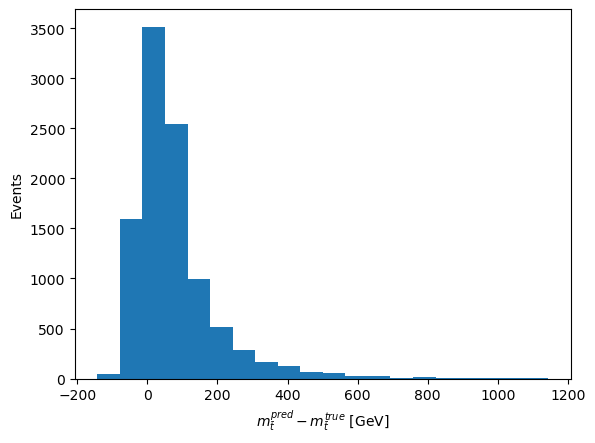

In [15]:
m_tbar_truth_gi = [m_tbar_truth[i] for i in good_index]

predacc2 = [m_tbar - m_tbar_truth_gi for m_tbar_truth_gi, m_tbar in zip(m_tbar_truth_gi, m_tbar)]

plt.hist(predacc2, bins=20,stacked=False, density=False)
plt.xlabel(r"$m_{\bar{t}}^{pred} - m_{\bar{t}}^{true}$ [GeV]")
plt.ylabel("Events")

Text(0, 0.5, '$m_{t}^{pred}$ [GeV]')

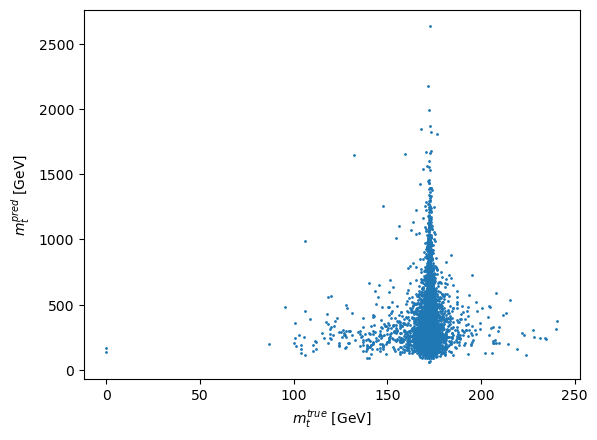

In [16]:
plt.scatter(m_t_truth_gi, m_t, s=1)
plt.xlabel("$m_{t}^{true}$ [GeV]")
plt.ylabel("$m_{t}^{pred}$ [GeV]")

Text(0, 0.5, '$m_{\\bar{t}}^{pred}$ [GeV]')

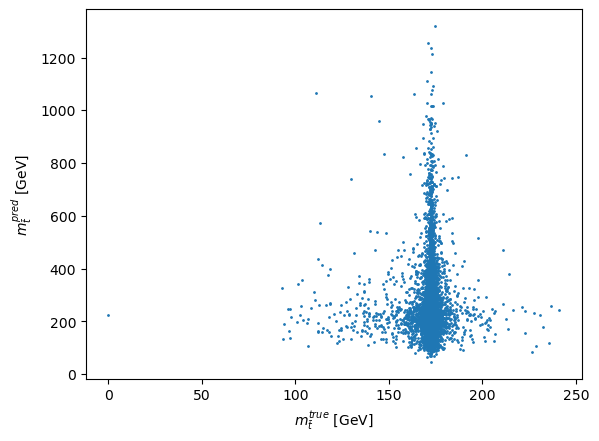

In [17]:
plt.scatter(m_tbar_truth_gi, m_tbar, s=1)
plt.xlabel(r"$m_{\bar{t}}^{true}$ [GeV]")
plt.ylabel(r"$m_{\bar{t}}^{pred}$ [GeV]")

In [18]:
p_t = []
p_t_truth = []
p_tbar = []
p_tbar_truth = []
p_tt = []
p_tt_truth = []
e_t = []
e_t_truth = []
e_tbar = []
e_tbar_truth = []
e_tt = []
e_tt_truth = []

for i in good_index:
    
    truth_t = root.TLorentzVector()
    truth_t.SetPtEtaPhiM(MC_t_beforeFSR_pt[i], MC_t_beforeFSR_eta[i], MC_t_beforeFSR_phi[i], MC_t_beforeFSR_m[i])
    truth_tbar = root.TLorentzVector()
    truth_tbar.SetPtEtaPhiM(MC_tbar_beforeFSR_pt[i], MC_tbar_beforeFSR_eta[i], MC_tbar_beforeFSR_phi[i], MC_tbar_beforeFSR_m[i])
    reco_lep0 = root.TLorentzVector()
    reco_lep0.SetPtEtaPhiE(lep0_pt[i], lep0_eta[i], lep0_phi[i], lep0_e[i])
    reco_lep1 = root.TLorentzVector()
    reco_lep1.SetPtEtaPhiE(lep1_pt[i], lep1_eta[i], lep1_phi[i], lep1_e[i])
    reco_b0 = root.TLorentzVector()
    reco_b0.SetPtEtaPhiE(b0_pt[i], b0_eta[i], b0_phi[i], b0_e[i])
    reco_b1 = root.TLorentzVector()
    reco_b1.SetPtEtaPhiE(b1_pt[i], b1_eta[i], b1_phi[i], b1_e[i])
    reco_v0 = root.TLorentzVector()
    reco_v0.SetPtEtaPhiM(v0_pt[i], v0_eta[i], v0_phi[i], v0_m_truth[i])
    reco_v1 = root.TLorentzVector()
    reco_v1.SetPtEtaPhiM(v1_pt[i], v1_eta[i], v1_phi[i], v1_m_truth[i])
    reco_t = reco_lep0 + reco_b0 + reco_v0
    reco_tbar = reco_lep1 + reco_b1 + reco_v1
    
    p_t.append(reco_t.Pt()/1000)
    p_t_truth.append(truth_t.Pt()/1000)
    p_tbar.append(reco_tbar.Pt()/1000)
    p_tbar_truth.append(truth_tbar.Pt()/1000)
    p_tt.append((reco_t + reco_tbar).Pt()/1000)
    p_tt_truth.append((truth_t + truth_tbar).Pt()/1000)
    e_t.append(reco_t.Eta())
    e_t_truth.append(truth_t.Eta())
    e_tbar.append(reco_tbar.Eta())
    e_tbar_truth.append(truth_tbar.Eta())
    e_tt.append((reco_t + reco_tbar).Eta())
    e_tt_truth.append((truth_t + truth_tbar).Eta())




NameError: name 'root' is not defined

In [ ]:
predacc3 = [p_t - p_t_truth for p_t_truth, p_t in zip(p_t_truth, p_t)]
plt.hist(predacc3, bins=20, range=(-700,700), stacked=False, density=False)
plt.ylabel("Events")
plt.xlabel("$p_{t}^{pred} - p_{t}^{true}$ [GeV]")

In [ ]:
predacc4 = [p_tbar - p_tbar_truth for p_tbar_truth, p_tbar in zip(p_tbar_truth, p_tbar)]
plt.hist(predacc4, bins=20, range=(-700,700), stacked=False, density=False)
plt.ylabel("Events")
plt.xlabel(r"$p_{\bar{t}}^{pred} - p_{\bar{t}}^{true}$ [GeV]")

In [ ]:
plt.scatter(p_t_truth, p_t, s=1)
plt.xlabel("$p_{t}^{true}$ [GeV]")
plt.ylabel("$p_{t}^{pred}$ [GeV]")

In [ ]:
plt.scatter(p_tbar_truth, p_tbar, s=1)
plt.xlabel(r"$p_{\bar{t}}^{true}$ [GeV]")
plt.ylabel(r"$p_{\bar{t}}^{pred}$ [GeV]")


In [ ]:
predacc5 = [p_tt - p_tt_truth for p_tt_truth, p_tt in zip(p_tt_truth, p_tt)]
plt.hist(predacc5, bins=20, range=(-700,700), stacked=False, density=False)
plt.ylabel("Events")
plt.xlabel(r"$p_{t\bar{t}}^{pred} - p_{t\bar{t}}^{true}$ [GeV]")

In [ ]:
plt.scatter(p_tt_truth, p_tt, s=1)
plt.xlabel(r"$p_{t\bar{t}}^{true}$ [GeV]")  
plt.ylabel(r"$p_{t\bar{t}}^{pred}$ [GeV]")

In [ ]:
predacc6 = [e_t - e_t_truth for e_t_truth, e_t in zip(e_t_truth, e_t)]
plt.hist(predacc6, bins=20, range=(-1,1), stacked=False, density=False)
plt.ylabel("Events")
plt.xlabel(r"$\eta_{t}^{pred} - \eta_{t}^{true}$")


In [ ]:
predacc7 = [e_tbar - e_tbar_truth for e_tbar_truth, e_tbar in zip(e_tbar_truth, e_tbar)]
plt.hist(predacc7, bins=20, range=(-1,1), stacked=False, density=False)
plt.ylabel("Events")
plt.xlabel(r"$\eta_{\bar{t}}^{pred} - \eta_{\bar{t}}^{true}$")


In [ ]:
plt.scatter(e_t_truth, e_t, s=1)
plt.xlabel(r"$\eta_{t}^{true}$")
plt.ylabel(r"$\eta_{t}^{pred}$")


In [ ]:
for i in range(20):
    print(e_t_truth[i], e_t[i], e_t_truth[i] - e_t[i])